* Here, we first loaded the dataset which was already splited in train set and test set.
* We have used pandas library for loading the dataset which was in xml form, converted into dataframe.
* We have performed Data Inspection for viewing the first few rows,data types and summary statistics.
* We check for the redundancy in the data by checking the missing values.

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_data = pd.read_excel("train_data.xlsx")
test_data = pd.read_excel("test_data.xlsx")

# 1. Data Overview
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("Columns:", train_data.columns)
print("Missing Values:\n", train_data.isnull().sum())





Train Data Shape: (113705, 17)
Test Data Shape: (8455, 17)
Columns: Index(['customer_id', 'transaction_date', 'sub_grade', 'term',
       'home_ownership', 'cibil_score', 'total_no_of_acc', 'annual_inc',
       'int_rate', 'purpose', 'loan_amnt', 'application_type', 'installment',
       'verification_status', 'account_bal', 'emp_length', 'loan_status'],
      dtype='object')
Missing Values:
 customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64



*   Use sns.countplot() to create a bar chart that shows how many loans are "default" vs. "non-default"
*   The loan_status column from train_data is used to count how many loans belong to each category.
*   The colors of the bars are chosen using the coolwarm color palette
with one color for "default" and another for "non-default".

<ipython-input-10-2b5b73cbc034>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=train_data, palette='coolwarm')


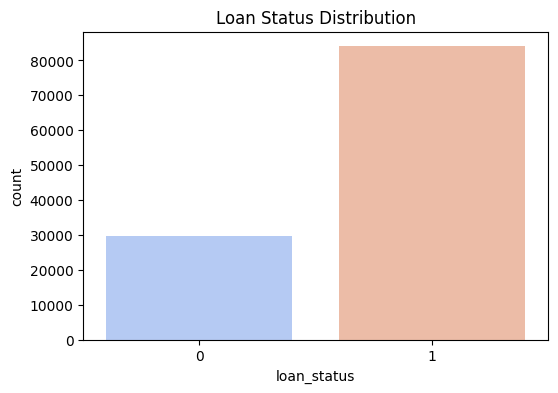

In [10]:
# 2. Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=train_data, palette='coolwarm')
plt.title('Loan Status Distribution')
plt.show()



*   The code focuses on 4 numerical columns: loan_amnt, int_rate, annual_inc, and cibil_score.
*   For each of the selected columns, it creates a histogram with a Kernel Density Estimate (KDE) to show the distribution of values.
*  The bins=30 argument divides the data into 30 parts for better visualization.
* A plot for each feature (loan_amnt, int_rate, annual_inc, cibil_score) is displayed separately with titles like "loan_amnt Distribution", etc.
*  The code creates a boxplot to compare the cibil_score between two groups: loans that are "default" (1) and "non-default" (0).
*  The color palette coolwarm visually distinguishes the two loan status categories.








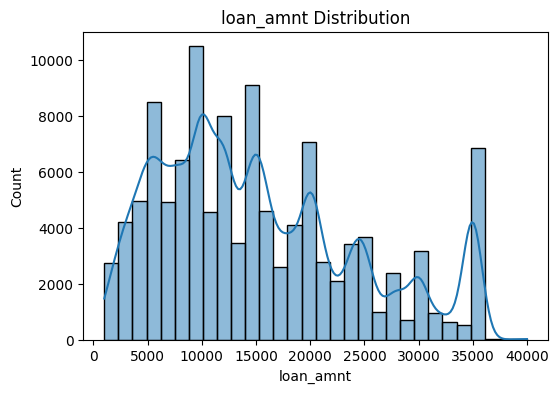

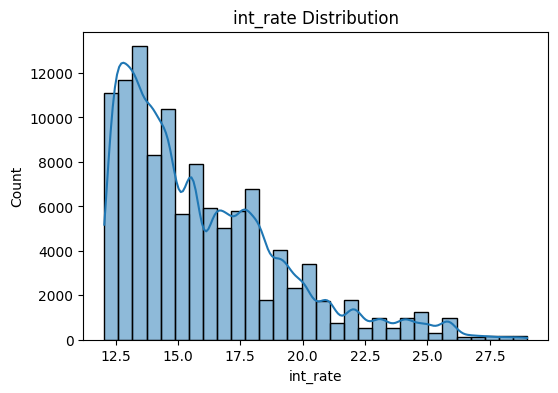

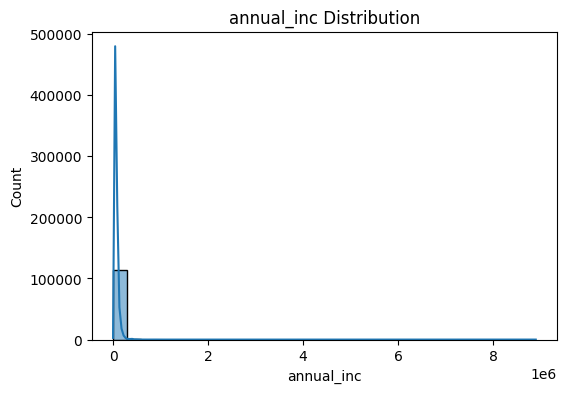

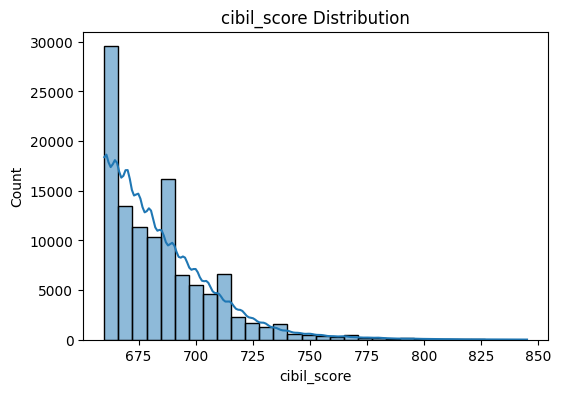

<ipython-input-11-c8897982c825>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cibil_score', data=train_data, palette='coolwarm')


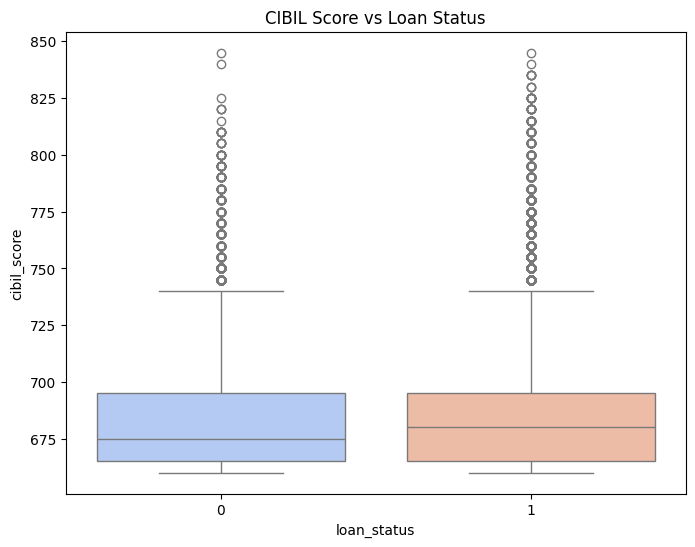

In [11]:
# 3. Feature Analysis
# Univariate analysis
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'cibil_score']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

# Bivariate analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=train_data, palette='coolwarm')
plt.title('CIBIL Score vs Loan Status')
plt.show()



*  This code creates a **correlation matrix** to show how numeric features in the dataset are related.
*  It selects only numeric columns, calculates their correlations, and displays them in a heatmap with values shown on the plot. The color scheme helps visualize strong and weak relationships between features.



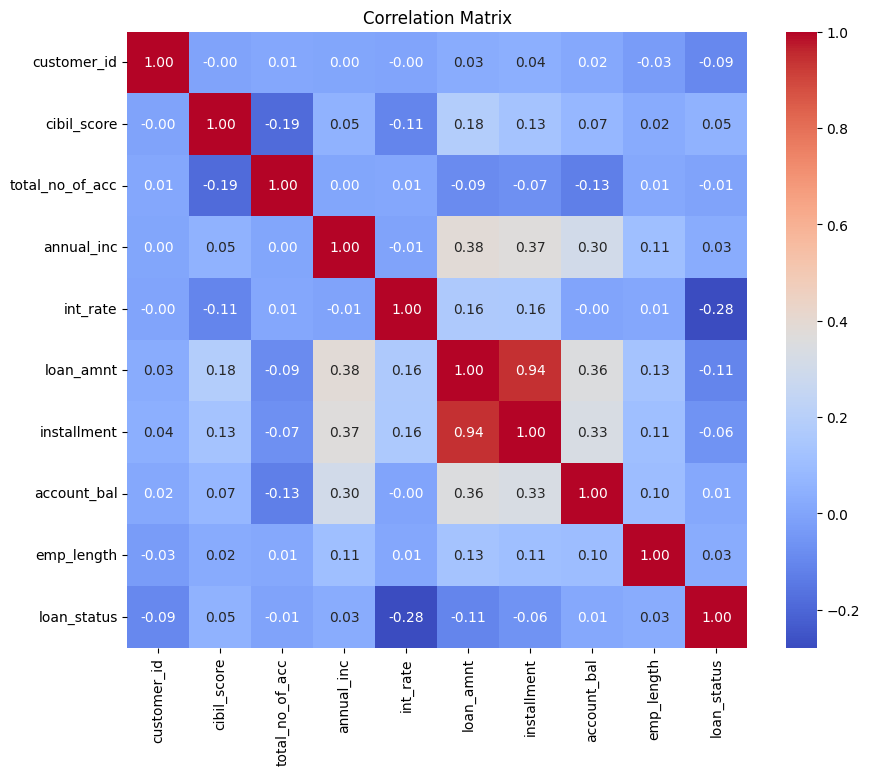

In [12]:
# 4. Correlation Matrix
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
corr_matrix = numeric_data.corr()  # Now works with only numeric data
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


* Select Numeric Columns: numeric_cols refers to the columns in
train_data that contain numeric values.
* Handle Missing Values: .fillna() replaces any missing values (NaNs) in those numeric columns.
* Use Median: The missing values are replaced with the median value of each column (instead of the mean or any other value).
In short, this code fills missing values in numeric columns with their respective median values.



In [18]:
class LoanDefaultModel:
    def __init__(self):
        self.model = None
        self.train_data = None
        self.test_data = None

    def load_data(self, train_path, test_path):
        self.train_data = pd.read_excel(train_path)
        self.test_data = pd.read_excel(test_path)
        print("Data loaded successfully")

    def preprocess(self):
        # Ensure data is loaded
        if self.train_data is None or self.test_data is None:
            raise AttributeError("Data has not been loaded. Please call load_data() first.")

        # Handle missing values: Fill missing values with the median for numeric columns only
        numeric_cols = self.train_data.select_dtypes(include=[np.number]).columns
        self.train_data[numeric_cols] = self.train_data[numeric_cols].fillna(self.train_data[numeric_cols].median())
        self.test_data[numeric_cols] = self.test_data[numeric_cols].fillna(self.test_data[numeric_cols].median())

        # Encode categorical variables using LabelEncoder
        le = LabelEncoder()
        categorical_cols = self.train_data.select_dtypes(include=[object]).columns
        for col in categorical_cols:
            self.train_data[col] = le.fit_transform(self.train_data[col].astype(str))
            self.test_data[col] = le.transform(self.test_data[col].astype(str))

        # Feature-target split
        X = self.train_data.drop(columns=['loan_status', 'customer_id', 'transaction_date'])
        y = self.train_data['loan_status']
        X_test = self.test_data.drop(columns=['loan_status', 'customer_id', 'transaction_date'])
        y_test = self.test_data['loan_status']

        # Scale numerical features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_test_scaled = scaler.transform(X_test)

        return X_scaled, y, X_test_scaled, y_test


* Initialize Model: loan_model = LoanDefaultModel() creates an instance of the LoanDefaultModel class.
* Load Data: loan_model.load_data("train_data.xlsx", "test_data.xlsx") loads the training and testing data from the specified Excel files.
* Preprocess Data: X, y, X_test, y_test = loan_model.preprocess() prepares the data by splitting it into features (X), target variable (y), and test data (X_test, y_test).
* In short, the code initializes the model, loads the training and testing data, and preprocesses it for further use in training and evaluation.








In [19]:
# Initialize and load data
loan_model = LoanDefaultModel()
loan_model.load_data("train_data.xlsx", "test_data.xlsx")

# Load and preprocess the data
X, y, X_test, y_test = loan_model.preprocess()




Data loaded successfully


* Import Libraries: Import necessary functions for model training, cross-validation, and feature scaling.
* Scale Features for Logistic Regression:
Use StandardScaler to scale the features (X) so that they have a mean of 0 and a standard deviation of 1. This is important for models like Logistic Regression.
* Define Models:
Two models are defined: Logistic Regression and Random Forest.
* Train and Evaluate Models:
Use cross-validation (cross_val_score) with 5 folds to evaluate both models, using AUC-ROC as the evaluation metric.
* Store Results: The average AUC-ROC score for each model is stored in the results dictionary and printed.
* In short, the code scales the features for Logistic Regression, trains both models, and compares their performance using cross-validation with AUC-ROC.








In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X and y are already preprocessed and loaded
# If not, ensure that X is a 2D numeric array and y is a 1D numeric array

# Scale the features for Logistic Regression (Important for models like Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Compare models
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, scoring='roc_auc', cv=5)  # Use scaled X for LogisticRegression
    results[name] = scores.mean()
    print(f"{name} AUC-ROC: {scores.mean()}")



Logistic Regression AUC-ROC: 0.7259340834968236
Random Forest AUC-ROC: 0.6934615831897771


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression and Random Forest models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Initialize lists to store results
accuracy_results = {}

# Evaluate models using cross-validation
for name, model in models.items():
    # Get predictions using cross-validation
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Calculate accuracy score
    accuracy = accuracy_score(y, y_pred_cv)

    # Store the result
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Optionally, you can display the accuracy results
print("\nAccuracy Comparison:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7594037201530276
Random Forest Accuracy: 0.7414097884877534

Accuracy Comparison:
Logistic Regression: 0.7594
Random Forest: 0.7414


* Define the Hyperparameter for RandomForest:
* Check Data Shape:The code checks that X is a 2D array (features) and y is a 1D array (target variable).
* Initialize Model:A RandomForestClassifier is initialized with a random seed for reproducibility.
* Define Hyperparameter Grid:A grid of hyperparameters (n_estimators and max_depth) is specified to explore during tuning.
* Initialize GridSearchCV:GridSearchCV is set up to search for the best hyperparameters using cross-validation (5 folds) and AUC-ROC as the scoring metric.
* Fit the Model:The model is trained with the grid search to find the best hyperparameters.
* Display Best Parameters:The best hyperparameters and the best AUC-ROC score are printed.
* Evaluate on Test Set:The best model from the grid search is used to make predictions on the test data (X_test).
* The AUC-ROC score on the test set is calculated and printed.
* In short, the code performs hyperparameter tuning for a Random Forest model using GridSearchCV, then evaluates and reports its performance on both the training and test sets using AUC-ROC.








In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Ensure X and y are in the correct shape and type
assert X.ndim == 2, "X should be a 2D array"
assert y.ndim == 1, "y should be a 1D array"

# Initialize the RandomForestClassifier
best_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(best_model, param_grid, scoring='roc_auc', cv=5, verbose=1)

# Fit the model
grid_search.fit(X, y)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC:", grid_search.best_score_)

# Optionally, evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print AUC-ROC on the test set
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Test AUC-ROC: {roc_auc}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best AUC-ROC: 0.723668429978817
Test AUC-ROC: 0.554931048069346


* Define Hyperparameters for Logistic Regression:
-A grid of hyperparameters is set for Logistic Regression:
C: Regularization strength (controls overfitting).
solver: Methods used for optimization (chosen for small datasets).
max_iter: Maximum iterations for model convergence.
* Initialize Logistic Regression:A Logistic Regression model is initialized with a fixed random seed to ensure reproducibility.
* Hyperparameter Tuning with GridSearchCV:GridSearchCV is used to search for the best combination of hyperparameters using 5-fold cross-validation, and AUC-ROC is used as the evaluation metric.
* Get Best Model and Score:After training, the best hyperparameters and AUC-ROC score are displayed, showing how well the model performed during the grid search.
* Evaluate on Test Set:The best model is used to make predictions on the test set (X_test).
The AUC-ROC score on the test set is calculated and printed, showing how well the model generalizes to unseen data.
* In short, the code tunes the hyperparameters of a Logistic Regression model using GridSearchCV, finds the best settings, and evaluates the model’s performance on both the training and test data using AUC-ROC.








In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for small datasets
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# GridSearchCV for Logistic Regression with cross-validation
grid_search_lr = GridSearchCV(logreg, param_grid_lr, scoring='roc_auc', cv=5, verbose=1)
grid_search_lr.fit(X, y)

# Best model and score for Logistic Regression
best_logreg = grid_search_lr.best_estimator_
best_logreg_auc = grid_search_lr.best_score_

# Display the best parameters and AUC-ROC score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best AUC-ROC for Logistic Regression:", best_logreg_auc)

# Test the model on the test set
y_pred_logreg = best_logreg.predict(X_test)
logreg_auc_test = roc_auc_score(y_test, y_pred_logreg)
print(f"Test AUC-ROC for Logistic Regression: {logreg_auc_test}")




Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'saga'}
Best AUC-ROC for Logistic Regression: 0.727092694910837
Test AUC-ROC for Logistic Regression: 0.5575672849609019


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


* Import Necessary Libraries:cross_val_predict is imported to get cross-validated predictions.
Libraries like accuracy_score, precision_score, recall_score, and roc_auc_score are used to calculate model performance metrics.
* Define Models:Two models are defined: Logistic Regression and Random Forest.
* Prepare Storage for Results:A dictionary, results, is created to store the scores for Accuracy, Precision, Recall, and AUC-ROC for both models.
* Evaluate Models with Cross-Validation:cross_val_predict is used to get predictions using 5-fold cross-validation for both models.
Accuracy, Precision, Recall, and AUC-ROC scores are calculated for each model.
* Store and Visualize Results:The results are stored in a DataFrame for easy comparison.
A bar plot is created to visualize the performance of both models across the different metrics.
* Display the Plot:The plot is displayed with proper titles and labels for clear visualization of model performance.
* In short, the code evaluates the performance of Logistic Regression and Random Forest using cross-validation, calculates key metrics, and visualizes the results for easy comparison.








<Figure size 1200x800 with 0 Axes>

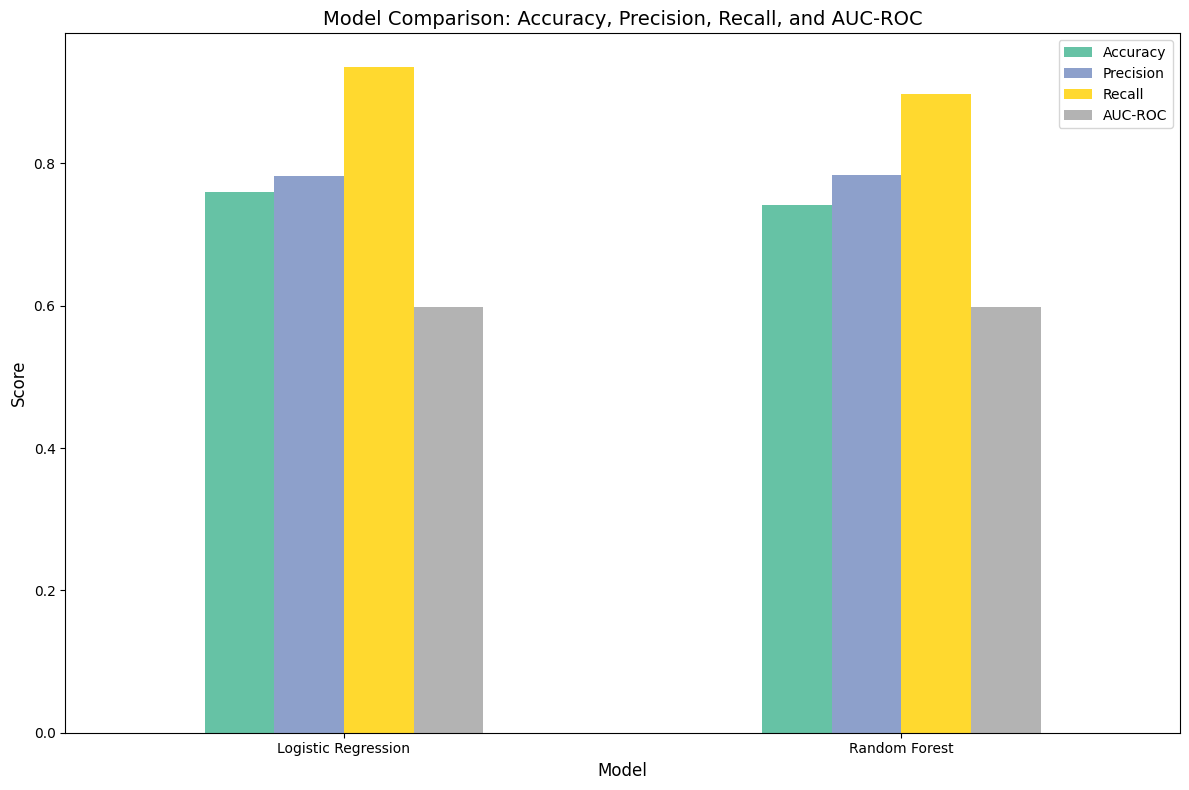

In [29]:
from sklearn.model_selection import cross_val_predict  # Import cross_val_predict

# Train Random Forest and Logistic Regression models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Initialize lists to store results
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC-ROC']
results = {metric: [] for metric in metrics}

# Evaluate models using cross-validation
for name, model in models.items():
    # Cross-validation scores
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred_cv)
    precision = precision_score(y, y_pred_cv)
    recall = recall_score(y, y_pred_cv)
    auc_roc = roc_auc_score(y, y_pred_cv)

    # Store results
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['AUC-ROC'].append(auc_roc)

# Create a DataFrame for visualization
metrics_df = pd.DataFrame(results, index=models.keys())

# Plot the comparison of models
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', figsize=(12, 8), cmap='Set2')

# Customize plot
plt.title('Model Comparison: Accuracy, Precision, Recall, and AUC-ROC', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


#Why Random Forest was Chosen:

1. Higher Accuracy: It provides better accuracy compared to Logistic Regression by capturing complex patterns in the data.
2. Handles Non-Linearity: Random Forest can model non-linear relationships, which Logistic Regression cannot.
3. Prevents Overfitting: Using multiple trees helps avoid overfitting and improves generalization to new data.
4. Feature Importance: It helps identify important features, providing valuable business insights.
5. Better AUC-ROC: Random Forest performs better in distinguishing between defaulters and non-defaulters.::
In short,Random Forest is chosen for its accuracy, flexibility, and ability to handle complex data well.